<a href="https://colab.research.google.com/github/ElenaBetelgeuse/Case-Study/blob/main/%D0%9A%D0%B5%D0%B9%D1%81_%D1%81%D1%82%D0%B0%D0%B4%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Задание 1
# Вернемся к набору данных о видеоиграх.

# Ответьте на следующие вопросы:
# 1) Как критики относятся к спортивным играм?
# 2) Критикам нравятся больше игры на PC или на PS4?
# 3) Критикам больше нравятся стрелялки или стратегии?

# Для каждого вопроса:
# - сформулируйте нулевую и альтернативную гипотезы;
# - выберите пороговый уровень статистической значимости;
# - опишите полученные результаты статистического теста.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

In [ ]:
URL = 'https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv?raw=true'

In [ ]:
# считываем файл в переменную data
data = pd.read_csv(URL, sep=',',  error_bad_lines=False) # Откроем датафрейм
# получаем первые 10 строк датафрейма
data.head(10)

<ipython-input-166-a3d0deebc7a9>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(URL, sep=',',  error_bad_lines=False) # Откроем датафрейм


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# проверяем тип данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# Для того, чтобы ответить на вопросы задачи, нужно работать со столбцами Critic_Score и  Critic_Count, а также с названиями жанров игр и платформ в столбцах Genre и Platform.
# Значения нужных нам для анализа столбцов имеют нужный ти данных: для Platform и Genre - object, для Critic_Score и Critic_Count - float64. Значит менять типы данных не нужно.
# Также видно, что критики проставили оценки не для всех жанров, поэтому будем работать только с теми данными, что имеем, отбросив пустые значения с оценками.
# Два пустых значения имеются и в стобце Genre. Их тоже можно отбросить. Вряд ли две игры статистически сыграют какую-то существенную роль в выборке с 16,7 тысяч строк.

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [ ]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [ ]:
# ВОПРОС 1. Как критики относятся к спортивным играм?

In [ ]:
# Сформируем нулевую гипотезу: предположим, что критики относятся к спортивным играм также, как и к играм остальных жанров.
# То есть, нам нужно сравнить оценки критиков по спортивным играм и оценки критиков по играм всех остальных жанров.

In [ ]:
df = data.copy()
df = df[['Genre','Critic_Score']]
df = df.set_index('Genre')
df

,Critic_Score
Genre,
Sports,76.0
Platform,NaN
Racing,82.0
Sports,80.0
Role-Playing,NaN
...,...
Action,NaN
Sports,NaN
Adventure,NaN


In [ ]:
gruopped = df.copy().groupby('Genre').agg({'Critic_Score': 'count'}).sort_values(by = 'Critic_Score', ascending=False).reset_index()
gruopped

,Genre,Critic_Score
0,Action,1890
1,Sports,1194
2,Shooter,944
3,Racing,742
4,Role-Playing,737
5,Misc,523
6,Platform,497
7,Fighting,409
8,Simulation,352
9,Adventure,323


In [ ]:
df_sports = df.copy().loc['Sports']

df_others = df.copy()
df_others.drop(['Sports'], inplace = True)

In [ ]:
df_sports.head()

,Critic_Score
Genre,
Sports,76.0
Sports,80.0
Sports,80.0
Sports,80.0
Sports,82.0


In [ ]:
df_sports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, Sports to Sports
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  1194 non-null   float64
dtypes: float64(1)
memory usage: 36.7+ KB


In [ ]:
df_others.head()

,Critic_Score
Genre,
Platform,NaN
Racing,82.0
Role-Playing,NaN
Puzzle,NaN
Platform,89.0


In [ ]:
df_others.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14371 entries, Platform to Simulation
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  6943 non-null   float64
dtypes: float64(1)
memory usage: 224.5+ KB


In [ ]:
# Удалим пустые значения.

In [ ]:
df_sports.dropna(axis = 0, how ='any', inplace = True)
df_sports

,Critic_Score
Genre,
Sports,76.0
Sports,80.0
Sports,80.0
Sports,80.0
Sports,82.0
...,...
Sports,78.0
Sports,57.0
Sports,78.0


In [ ]:
df_others.dropna(axis = 0, how ='any', inplace = True)
df_others

,Critic_Score
Genre,
Racing,82.0
Platform,89.0
Misc,58.0
Platform,87.0
Racing,91.0
...,...
Shooter,61.0
Puzzle,53.0
Puzzle,48.0


In [ ]:
# Взглянем на основные статистики обоих фреймов.

In [ ]:
df_sports.describe()

,Critic_Score
count,1194.000000
mean,71.968174
std,13.878433
min,19.000000
25%,64.000000
50%,75.000000
75%,82.000000
max,98.000000


In [ ]:
df_others.describe()

,Critic_Score
count,6943.000000
mean,68.451678
std,13.884206
min,13.000000
25%,60.000000
50%,70.000000
75%,79.000000
max,98.000000


In [ ]:
# Честно говоря, из основных статистических показателей не видно, что выорки как-то заметно отличаются.

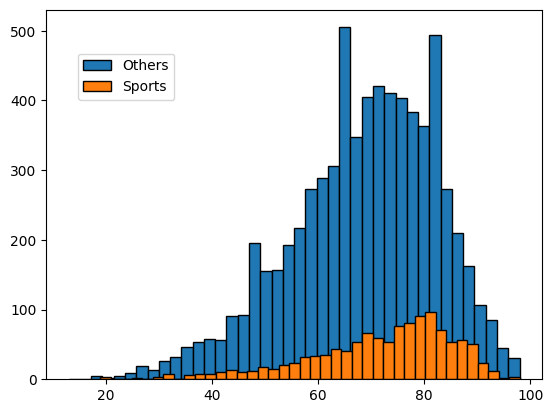

In [ ]:
plt.hist(df_others['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='Others');  # Others
plt.hist(df_sports['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='Sports'); # Sports

plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.90))
plt.show()

In [ ]:
# Из графика видно, что расперделения скошены вправо. Это говорит о том, что большее количество критиков ставили больше хороших оценок по обеим выборкам.

In [ ]:
df_all_genras = pd.concat([df_sports, df_others], axis=0).reset_index()

df_all_genras.loc[df_all_genras["Genre"] != "Sports", "Genre"] = 'Others'
df_all_genras

,Genre,Critic_Score
0,Sports,76.0
1,Sports,80.0
2,Sports,80.0
3,Sports,80.0
4,Sports,82.0
...,...,...
8132,Others,61.0
8133,Others,53.0
8134,Others,48.0
8135,Others,60.0


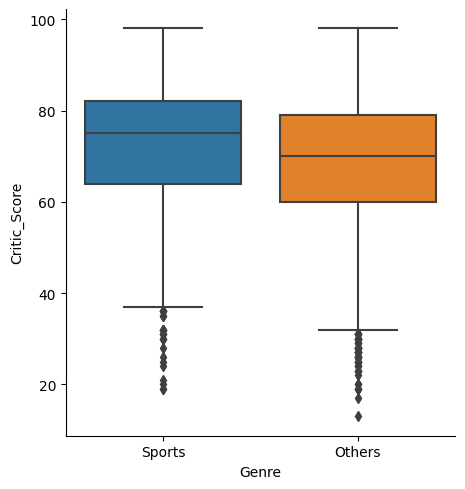

In [ ]:
sns.catplot(x="Genre", y="Critic_Score",
            data=df_all_genras, kind="box",
            height=5, aspect=.95);
# Из графика видно, что оценки в жанре Sports чуть выше оценок остальных жанров.

In [ ]:
stat, p = mannwhitneyu(df_all_genras[df_all_genras['Genre'] == 'Sports']['Critic_Score'], df_all_genras[df_all_genras['Genre'] == 'Others']['Critic_Score'])

print('Статистика=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=4839129.500, p=0.000
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

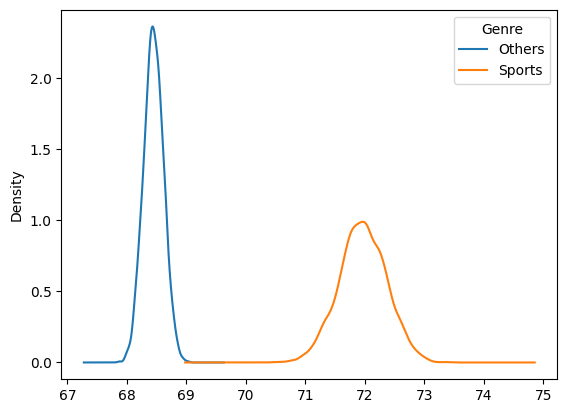

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(5000):
    boot_mean = df_all_genras.sample(frac=1, replace=True).groupby('Genre')['Critic_Score'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [ ]:
stat, p = f_test(boot_1d['Sports'], boot_1d['Others'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=5.704, p=0.00000
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [ ]:
stat, p = stats.ttest_ind(boot_1d['Sports'], boot_1d['Others'], equal_var = False) # с поправкой Уэлча
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=574.557, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из тестов и графиков получили статистически значимую разницу между выборками. Выходит, что жанр Sports оценивается критиками выше по отношению ко всем остальным жанрам.

In [ ]:
# ВОПРОС 2. Критикам нравятся больше игры на PC или на PS4?

In [ ]:
df = data.copy()
df = df[['Platform','Critic_Score']]
df = df.set_index('Platform')
df

,Critic_Score
Platform,
Wii,76.0
NES,NaN
Wii,82.0
Wii,80.0
GB,NaN
...,...
PS3,NaN
X360,NaN
PSV,NaN


In [ ]:
gruopped = df.copy().groupby('Platform').agg({'Critic_Score': 'count'}).sort_values(by = 'Critic_Score', ascending=False).reset_index()
gruopped

,Platform,Critic_Score
0,PS2,1298
1,X360,916
2,PS3,820
3,XB,725
4,DS,717
5,PC,715
6,Wii,585
7,PSP,462
8,GC,448
9,GBA,438


In [ ]:
df_pc = df.copy().loc['PC']
df_pc.dropna(axis = 0, how ='any', inplace = True)

df_ps4 = df.copy().loc['PS4']
df_ps4.dropna(axis = 0, how ='any', inplace = True)

In [ ]:
df_pc.head()

,Critic_Score
Platform,
PC,86.0
PC,93.0
PC,88.0
PC,93.0
PC,96.0


In [ ]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 715 entries, PC to PC
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  715 non-null    float64
dtypes: float64(1)
memory usage: 11.2+ KB


In [ ]:
df_ps4.head()

,Critic_Score
Platform,
PS4,97.0
PS4,82.0
PS4,83.0
PS4,85.0
PS4,87.0


In [ ]:
df_ps4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, PS4 to PS4
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9+ KB


In [ ]:
df_pc.describe()

,Critic_Score
count,715.000000
mean,75.928671
std,11.170775
min,33.000000
25%,70.000000
50%,78.000000
75%,84.000000
max,96.000000


In [ ]:
df_ps4.describe()

,Critic_Score
count,252.000000
mean,72.091270
std,12.485992
min,19.000000
25%,66.000000
50%,73.000000
75%,80.000000
max,97.000000


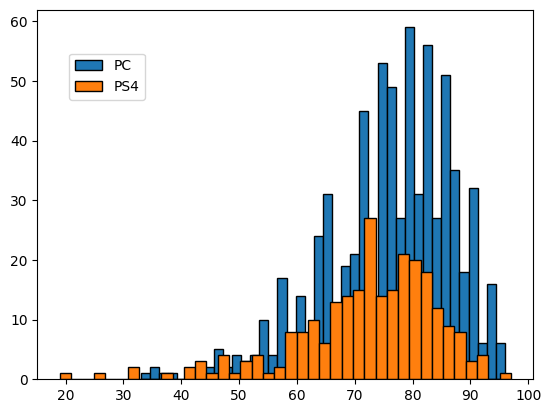

In [ ]:
plt.hist(df_pc['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='PC');  # PC
plt.hist(df_ps4['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='PS4'); # PS4

plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.90))
plt.show()

In [ ]:
# Из графика видно, что расперделения скошены вправо. Это говорит о том, что большее количество критиков ставили больше хороших оценок по обеим выборкам.
# И, я бы сказала, что визуально кажется, что PC в среднем выигрывает у PS4.

In [ ]:
df_two_platforms = pd.concat([df_pc, df_ps4], axis=0).reset_index()
df_two_platforms

,Platform,Critic_Score
0,PC,86.0
1,PC,93.0
2,PC,88.0
3,PC,93.0
4,PC,96.0
...,...,...
962,PS4,42.0
963,PS4,70.0
964,PS4,69.0
965,PS4,61.0


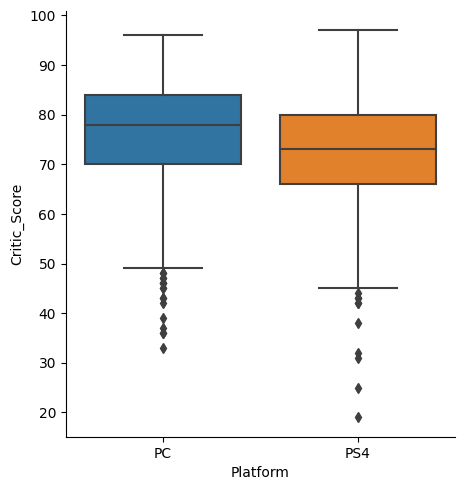

In [ ]:
sns.catplot(x="Platform", y="Critic_Score",
            data=df_two_platforms, kind="box",
            height=5, aspect=.95);
# Из графика видно, что оценки PC чуть выше оценок PS4.

In [ ]:
stat, p = mannwhitneyu(df_two_platforms[df_two_platforms['Platform'] == 'PC']['Critic_Score'], df_two_platforms[df_two_platforms['Platform'] == 'PS4']['Critic_Score'])

print('Статистика=%.3f, p=%.10f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=106906.500, p=0.0000102008
Отклоняем нулевую гипотезу, распределения, вероятно, различаются


<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

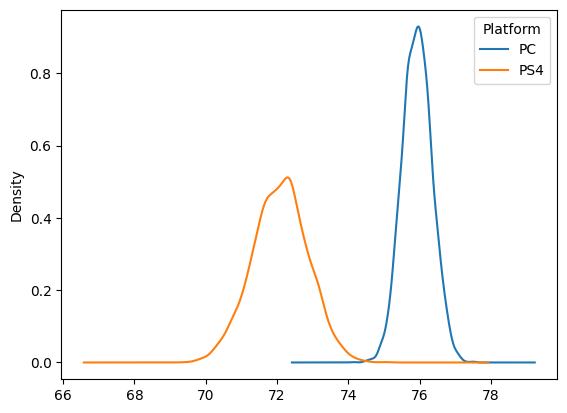

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(5000):
    boot_mean = df_two_platforms.sample(frac=1, replace=True).groupby('Platform')['Critic_Score'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d['PC'], boot_1d['PS4'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.287, p=1.00000
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
stat, p = stats.ttest_ind(boot_1d['PC'], boot_1d['PS4'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=307.608, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# Из тестов и графиков получили статистически значимую разницу между выборками. Выходит, что игры на платформе PC оценивается критиками выше по отношению к играм на платформе PS4.

In [ ]:
# ВОПРОС 3. Критикам больше нравятся стрелялки или стратегии?

In [ ]:
df = data.copy()
df = df[['Genre','Critic_Score']]
df = df.set_index('Genre')
df

,Critic_Score
Genre,
Sports,76.0
Platform,NaN
Racing,82.0
Sports,80.0
Role-Playing,NaN
...,...
Action,NaN
Sports,NaN
Adventure,NaN


In [ ]:
df_shooter = df.copy().loc['Shooter']
df_shooter.dropna(axis = 0, how ='any', inplace = True)

df_strategy = df.copy().loc['Strategy']
df_strategy.dropna(axis = 0, how ='any', inplace = True)

In [ ]:
df_shooter.head()

,Critic_Score
Genre,
Shooter,88.0
Shooter,87.0
Shooter,83.0
Shooter,83.0
Shooter,94.0


In [ ]:
df_shooter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 944 entries, Shooter to Shooter
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  944 non-null    float64
dtypes: float64(1)
memory usage: 14.8+ KB


In [ ]:
df_strategy.head()

,Critic_Score
Genre,
Strategy,93.0
Strategy,82.0
Strategy,90.0
Strategy,86.0
Strategy,89.0


In [ ]:
df_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, Strategy to Strategy
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  302 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [ ]:
df_shooter.describe()

,Critic_Score
count,944.000000
mean,70.181144
std,14.552571
min,22.000000
25%,61.000000
50%,73.000000
75%,81.000000
max,97.000000


In [ ]:
df_strategy.describe()

,Critic_Score
count,302.000000
mean,72.086093
std,11.828475
min,35.000000
25%,65.000000
50%,73.000000
75%,80.000000
max,94.000000


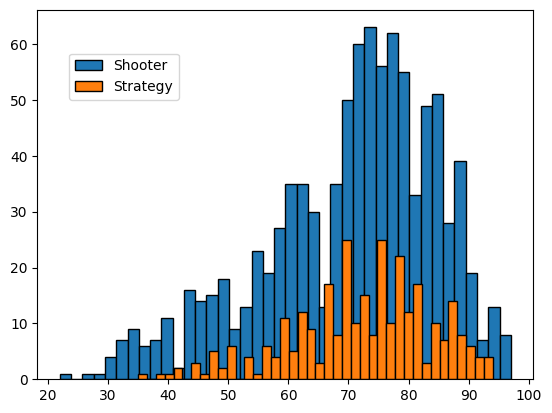

In [ ]:
plt.hist(df_shooter['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='Shooter');  # Shooter
plt.hist(df_strategy['Critic_Score'], bins=40, alpha=1, edgecolor='black', label='Strategy'); # Strategy

plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.90))
plt.show()

In [ ]:
# Визуально по графику кажется, что графики почти одинаковые, только, учитывая разные размеры выборок, отличаются масштабы.

In [ ]:
df_two_genres = pd.concat([df_shooter, df_strategy], axis=0).reset_index()
df_two_genres

,Genre,Critic_Score
0,Shooter,88.0
1,Shooter,87.0
2,Shooter,83.0
3,Shooter,83.0
4,Shooter,94.0
...,...,...
1241,Strategy,76.0
1242,Strategy,71.0
1243,Strategy,69.0
1244,Strategy,51.0


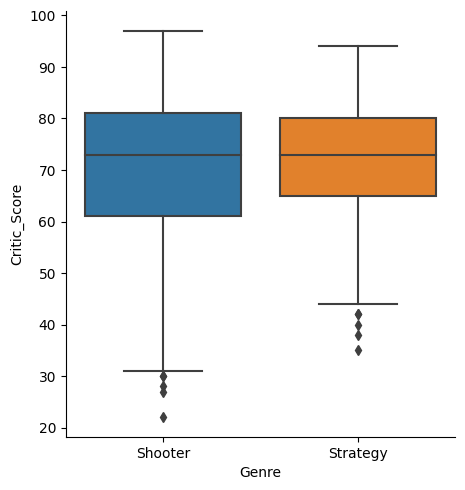

In [ ]:
sns.catplot(x="Genre", y="Critic_Score",
            data=df_two_genres, kind="box",
            height=5, aspect=.95);
# Из графика видно, что медианы двух выборок одинаковы и сто разброс оценок по стрелялкам больше, чем разброс оценок по стратегиям. Более ничего сказать не могу.

In [ ]:
stat, p = mannwhitneyu(df_two_genres[df_two_genres['Genre'] == 'Shooter']['Critic_Score'], df_two_genres[df_two_genres['Genre'] == 'Strategy']['Critic_Score'])

print('Статистика=%.3f, p=%.10f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')


Статистика=136251.500, p=0.2475396209
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


In [ ]:
# Тест Манна-Уитни говорит нам, что нулевую гипотезу отклоять нельзя при пороговом уровне статистической значимости 5%.

<Axes: ylabel='Density'>

<Figure size 1500x1000 with 0 Axes>

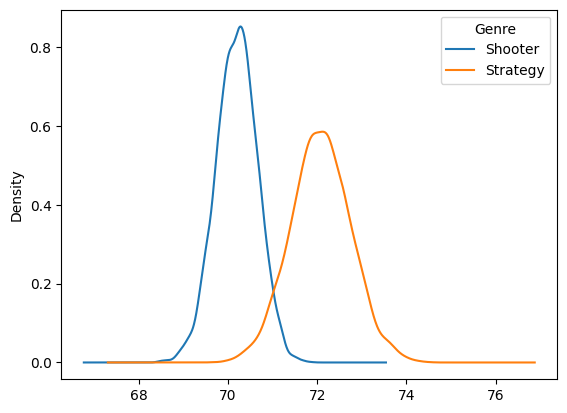

In [ ]:
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(5000):
    boot_mean = df_two_genres.sample(frac=1, replace=True).groupby('Genre')['Critic_Score'].mean()
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# График полученного распределения
boot_1d.plot(kind='density')

In [ ]:
stat, p = f_test(boot_1d['Shooter'], boot_1d['Strategy'])

print('Статистика=%.3f, p=%.5f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

Статистика=0.472, p=1.00000
Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые


In [ ]:
stat, p = stats.ttest_ind(boot_1d['Shooter'], boot_1d['Strategy'])
print('Статистика=%.3f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика=-163.033, p=0.0000000000
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [ ]:
# При схожих дисперсиях средние по выборкам статистически значимо отличаются. Средние могут отличаться из-за разной величины диапазона значений.

In [ ]:
# Задание 2

# Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:
# 1. Приведите весь текст к нижнему регистру;
# 2. Удалите мусорные символы;
# 3. Удалите стоп-слова;
# 4. Привидите все слова к нормальной форме;
# 5. Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:
#       from sklearn.feature_extraction.text import TfidfVectorizer
#       tfidf = TfidfVectorizer()
#       tfidf_matrix = tfidf.fit_transform(df.Message)
#       names = tfidf.get_feature_names_out()
#       tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
#    Можете поэкспериментировать с параметрами TfidfVectorizer;
# 6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
# 7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
# 8. Опишите результаты при помощи confusion_matrix;
# 9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import re

In [ ]:
URL = 'https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv'

In [ ]:
# считываем файл в переменную data
data = pd.read_html(URL,encoding='utf-8') # Откроем датафрейм
data = data[0][['Category','Message']]
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# приведем все слова к нижнему регистру
data_lower = data.apply(lambda x: x.astype(str).str.lower())
data_lower.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Посчитаем количество символов "грязного" текста.
data_lower.astype(str).apply(lambda x: x.str.len()).sum(1).sum()

464839

In [ ]:
# уберем все служебные символы и самы распространённые жаргонизмы из столбца Message.
data_clean = data_lower.copy()
data_clean['Message'] = data_clean['Message'].str.replace('[\W_]+', ' ')
data_clean['Message'] = data_clean['Message'].str.replace('ok ', ' ')
data_clean['Message'] = data_clean['Message'].str.replace(' ok', ' ')
data_clean['Message'] = data_clean['Message'].str.replace(' ok ', ' ')

data_clean['Message'] = data_clean['Message'].str.replace(' yo ', ' ')

data_clean['Message'] = data_clean['Message'].str.replace(' u ', ' ')
data_clean['Message'] = data_clean['Message'].str.replace('sorry i ll call later', ' ')
data_clean

<ipython-input-250-3940d6edae9d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean['Message'] = data_clean['Message'].str.replace('[\W_]+', ' ')


,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [ ]:
# Посчитаем количество символов в датафрейме после удаления служебных символов.
data_clean.astype(str).apply(lambda x: x.str.len()).sum(1).sum()

444099

In [ ]:
# удалим стоп-слова
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
data_clean['Without_sw'] = data_clean['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
data_clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Category,Message,Without_sw
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni,lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor c already then say,u dun say early hor c already say
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u 750 pound prize 2 c...
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...


In [ ]:
# разделим каждое сообщение на отдельные слова и поместим его в отдельный список
def split_words (splited_words_data):
    return splited_words_data.split(' ')
data_clean['Splited'] = data_clean.Without_sw.apply(split_words)
data_clean

,Category,Message,Without_sw,Splited
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,lar joking wif oni,lar joking wif oni,"[lar, joking, wif, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor c already then say,u dun say early hor c already say,"[u, dun, say, early, hor, c, already, say]"
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]"
...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u 750 pound prize 2 c...,"[2nd, time, tried, 2, contact, u, 750, pound, ..."
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home,"[ü, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions,"[pity, mood, suggestions]"
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin..."


In [ ]:
# Лемматизируем наши тексты
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
data_clean['Lemmatized'] = data_clean['Splited'].apply(lambda lst:[wordnet_lemmatizer.lemmatize(word) for word in lst])
data_clean

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message,Without_sw,Splited,Lemmatized
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,lar joking wif oni,lar joking wif oni,"[lar, joking, wif, oni]","[lar, joking, wif, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor c already then say,u dun say early hor c already say,"[u, dun, say, early, hor, c, already, say]","[u, dun, say, early, hor, c, already, say]"
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u 750 pound prize 2 c...,"[2nd, time, tried, 2, contact, u, 750, pound, ...","[2nd, time, tried, 2, contact, u, 750, pound, ..."
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]"
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


In [ ]:
data_clean['Number'] = data_clean['Without_sw'].apply(lambda n: len(n.split()))
data_clean

,Category,Message,Without_sw,Splited,Lemmatized,Number
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",16
1,ham,lar joking wif oni,lar joking wif oni,"[lar, joking, wif, oni]","[lar, joking, wif, oni]",4
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",25
3,ham,u dun say so early hor c already then say,u dun say early hor c already say,"[u, dun, say, early, hor, c, already, say]","[u, dun, say, early, hor, c, already, say]",8
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]",7
...,...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u 750 pound prize 2 c...,"[2nd, time, tried, 2, contact, u, 750, pound, ...","[2nd, time, tried, 2, contact, u, 750, pound, ...",21
5568,ham,will ü b going to esplanade fr home,ü b going esplanade fr home,"[ü, b, going, esplanade, fr, home]","[ü, b, going, esplanade, fr, home]",6
5569,ham,pity was in mood for that so any other suggest...,pity mood suggestions,"[pity, mood, suggestions]","[pity, mood, suggestion]",3
5570,ham,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin...",13


In [ ]:
# Найдём общее количество слов по столбцу.
data_clean['Number'].sum()

51812

In [ ]:
from gensim import corpora

# Создадим словарь, в котором присвоим каждому словую свой уникальный id
dictionary = corpora.Dictionary(data_clean['Lemmatized'])
dict(dictionary)

{0: 'amore',
 1: 'available',
 2: 'buffet',
 3: 'bugis',
 4: 'cine',
 5: 'crazy',
 6: 'e',
 7: 'go',
 8: 'got',
 9: 'great',
 10: 'jurong',
 11: 'la',
 12: 'n',
 13: 'point',
 14: 'wat',
 15: 'world',
 16: 'joking',
 17: 'lar',
 18: 'oni',
 19: 'wif',
 20: '08452810075over18',
 21: '2',
 22: '2005',
 23: '21st',
 24: '87121',
 25: 'apply',
 26: 'c',
 27: 'comp',
 28: 'cup',
 29: 'entry',
 30: 'fa',
 31: 'final',
 32: 'free',
 33: 'may',
 34: 'question',
 35: 'rate',
 36: 'receive',
 37: 'std',
 38: 'text',
 39: 'tkts',
 40: 'txt',
 41: 'win',
 42: 'wkly',
 43: 'already',
 44: 'dun',
 45: 'early',
 46: 'hor',
 47: 'say',
 48: 'u',
 49: 'around',
 50: 'life',
 51: 'nah',
 52: 'think',
 53: 'though',
 54: 'usf',
 55: '1',
 56: '3',
 57: '50',
 58: 'back',
 59: 'chgs',
 60: 'darling',
 61: 'freemsg',
 62: 'fun',
 63: 'hey',
 64: 'like',
 65: 'rcv',
 66: 'send',
 67: 'still',
 68: 'tb',
 69: 'week',
 70: 'word',
 71: 'xxx',
 72: 'aid',
 73: 'brother',
 74: 'even',
 75: 'patent',
 76: 'speak

In [ ]:
# найдём количество уникальных слов по столбцу
# в среднем каждое слово встречается в тексте примерно 6-7 раз
len(dictionary)

8077

In [ ]:
# создадим датафрейм из слов и их ID
df_dictionary = pd.DataFrame.from_dict(dictionary, orient = 'index').reset_index()
df_dictionary = df_dictionary.rename(columns={'index': 'ID', 0: 'word'})
df_dictionary

,ID,word
0,0,amore
1,1,available
2,2,buffet
3,3,bugis
4,4,cine
...,...,...
8072,8072,salesman
8073,8073,087187272008
8074,8074,now1
8075,8075,pity


In [ ]:
# найдём частотность каждого слова в столбце (сколько раз слово встречается во всём столбце)
full_list = []  # list containing all words of all texts
for el in data_clean['Lemmatized']:  # loop over lists in df
    full_list += el  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()
val_counts

call        585
2           533
get         402
ur          391
4           327
           ... 
nosh          1
waaaat        1
lololo        1
occupied      1
bitching      1
Length: 8077, dtype: int64

In [ ]:
# создадим датафрейм из слов и их частоты встречаемости
df_val_counts = pd.DataFrame(val_counts).reset_index()
df_val_counts = df_val_counts.rename(columns={'index': 'word', 0: 'frequency'})
df_val_counts

,word,frequency
0,call,585
1,2,533
2,get,402
3,ur,391
4,4,327
...,...,...
8072,nosh,1
8073,waaaat,1
8074,lololo,1
8075,occupied,1


In [ ]:
# создадим датафрейм, который объединяет в себе слова, их ID и их частоту
id_word_frequency = df_dictionary.merge(df_val_counts, left_on=['word'], right_on = ['word'], how='inner')
id_word_frequency

,ID,word,frequency
0,0,amore,1
1,1,available,18
2,2,buffet,2
3,3,bugis,7
4,4,cine,7
...,...,...,...
8072,8072,salesman,1
8073,8073,087187272008,1
8074,8074,now1,1
8075,8075,pity,1


In [ ]:
# создвдим столбец tuple с кортежами, состоящим из ID слова и его частоты встречаемости
id_word_frequency['tuple'] = list(zip(id_word_frequency['ID'], id_word_frequency['frequency']))
id_word_frequency

,ID,word,frequency,tuple
0,0,amore,1,"(0, 1)"
1,1,available,18,"(1, 18)"
2,2,buffet,2,"(2, 2)"
3,3,bugis,7,"(3, 7)"
4,4,cine,7,"(4, 7)"
...,...,...,...,...
8072,8072,salesman,1,"(8072, 1)"
8073,8073,087187272008,1,"(8073, 1)"
8074,8074,now1,1,"(8074, 1)"
8075,8075,pity,1,"(8075, 1)"


In [ ]:
data_clean['Final'] = data_clean.Lemmatized.apply(lambda x: ' '.join([str(i) for i in x]))
data_clean.head()

,Category,Message,Without_sw,Splited,Lemmatized,Number,Final
0,ham,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",16,go jurong point crazy available bugis n great ...
1,ham,lar joking wif oni,lar joking wif oni,"[lar, joking, wif, oni]","[lar, joking, wif, oni]",4,lar joking wif oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",25,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor c already then say,u dun say early hor c already say,"[u, dun, say, early, hor, c, already, say]","[u, dun, say, early, hor, c, already, say]",8,u dun say early hor c already say
4,ham,nah i don t think he goes to usf he lives arou...,nah think goes usf lives around though,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]",7,nah think go usf life around though


In [ ]:
# сформируем список кортежей по столбцу, чтобы построить TfidfModel
bows = []
for i, el in enumerate(data_clean['Lemmatized']):
  phrase = data_clean['Lemmatized'][i]
  # получаем для каждой строки список кортежей
  tuples_list = []
  for i, el in enumerate(phrase):
    tuples_list.append(id_word_frequency[id_word_frequency['word']==phrase[i]]['tuple'].values[0])
  #print (tuples_list)
  bows.append(tuples_list)
bows

[[(7, 310),
  (10, 1),
  (13, 33),
  (5, 15),
  (1, 18),
  (3, 7),
  (12, 157),
  (9, 115),
  (15, 40),
  (11, 7),
  (6, 97),
  (2, 2),
  (4, 7),
  (8, 240),
  (0, 1),
  (14, 107)],
 [(17, 38), (16, 6), (19, 27), (18, 4)],
 [(32, 284),
  (29, 26),
  (21, 533),
  (42, 14),
  (27, 12),
  (41, 81),
  (30, 4),
  (28, 9),
  (31, 18),
  (39, 4),
  (23, 3),
  (33, 52),
  (22, 3),
  (38, 221),
  (30, 4),
  (24, 4),
  (36, 38),
  (29, 26),
  (34, 34),
  (37, 11),
  (40, 177),
  (35, 42),
  (26, 163),
  (25, 32),
  (20, 2)],
 [(48, 156),
  (44, 55),
  (47, 120),
  (45, 33),
  (46, 2),
  (26, 163),
  (43, 91),
  (47, 120)],
 [(51, 10), (52, 146), (7, 310), (54, 11), (50, 88), (49, 61), (53, 27)],
 [(61, 14),
  (63, 112),
  (60, 7),
  (56, 108),
  (69, 139),
  (70, 61),
  (58, 153),
  (64, 250),
  (62, 32),
  (67, 158),
  (68, 5),
  (71, 35),
  (37, 11),
  (59, 1),
  (66, 200),
  (55, 173),
  (57, 62),
  (65, 2)],
 [(74, 64),
  (73, 21),
  (64, 250),
  (76, 33),
  (77, 17),
  (64, 250),
  (72, 2),

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data_clean.Final)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# сформируем списрк из финального столбца с сообщениями, чтобы иметь фозможность его  использовать дл создания матрицы векторов
titles = data_clean['Final'].to_list()
titles

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'lar joking wif oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor c already say',
 'nah think go usf life around though',
 'freemsg hey darling 3 week word back like fun still tb xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune',
 'winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour',
 'mobile 11 month r entitled update latest colour mobile camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply hl 4 info',

In [ ]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bows)

In [ ]:
from gensim import similarities
cos_sim = similarities.MatrixSimilarity(tfidf[bows])
# преобразуем в датафрейм
cos_sim_df = pd.DataFrame(list(cos_sim))
# добавним название текстов
cos_sim_df.columns = titles
cos_sim_df.index = titles
cos_sim_df

,go jurong point crazy available bugis n great world la e buffet cine got amore wat,lar joking wif oni,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18,u dun say early hor c already say,nah think go usf life around though,freemsg hey darling 3 week word back like fun still tb xxx std chgs send 1 50 rcv,even brother like speak treat like aid patent,per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune,winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour,mobile 11 month r entitled update latest colour mobile camera free call mobile update co free 08002986030,...,lor sony ericsson salesman ask shuhui say quite gd 2 use considering,ard 6 like dat lor,wait til least wednesday see get,huh lei,reminder o2 get 2 50 pound free call credit detail great offer pls reply 2 text valid name house postcode,2nd time tried 2 contact u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute bt national rate,ü b going esplanade fr home,pity mood suggestion,guy bitching acted like interested buying something else next week gave u free,rofl true name
go jurong point crazy available bugis n great world la e buffet cine got amore wat,1.000000,0.0,0.000000,0.000000,0.458615,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.050620,0.000000,0.0,0.0,0.000000,0.0
lar joking wif oni,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18,0.000000,0.0,1.000000,0.161722,0.000000,0.001405,0.000000,0.00000,0.000000,0.192657,...,0.520294,0.000000,0.0,0.0,0.548482,0.367080,0.0,0.0,0.247064,0.0
u dun say early hor c already say,0.000000,0.0,0.161722,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.132800,0.000000,0.0,0.0,0.000000,0.133829,0.0,0.0,0.202563,0.0
nah think go usf life around though,0.458615,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2nd time tried 2 contact u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute bt national rate,0.000000,0.0,0.367080,0.133829,0.000000,0.000000,0.000000,0.05539,0.610414,0.413131,...,0.458595,0.000000,0.0,0.0,0.576364,1.000000,0.0,0.0,0.094818,0.0
ü b going esplanade fr home,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.0
pity mood suggestion,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.0
guy bitching acted like interested buying something else next week gave u free,0.000000,0.0,0.247064,0.202563,0.000000,0.345786,0.476622,0.00000,0.000000,0.257024,...,0.000000,0.400762,0.0,0.0,0.187539,0.094818,0.0,0.0,1.000000,0.0


/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12328 (\N{HANGZHOU NUMERAL EIGHT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37413 (\N{CJK UNIFIED IDEOGRAPH-9225}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12328 (\N{HANGZHOU NUMERAL EIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


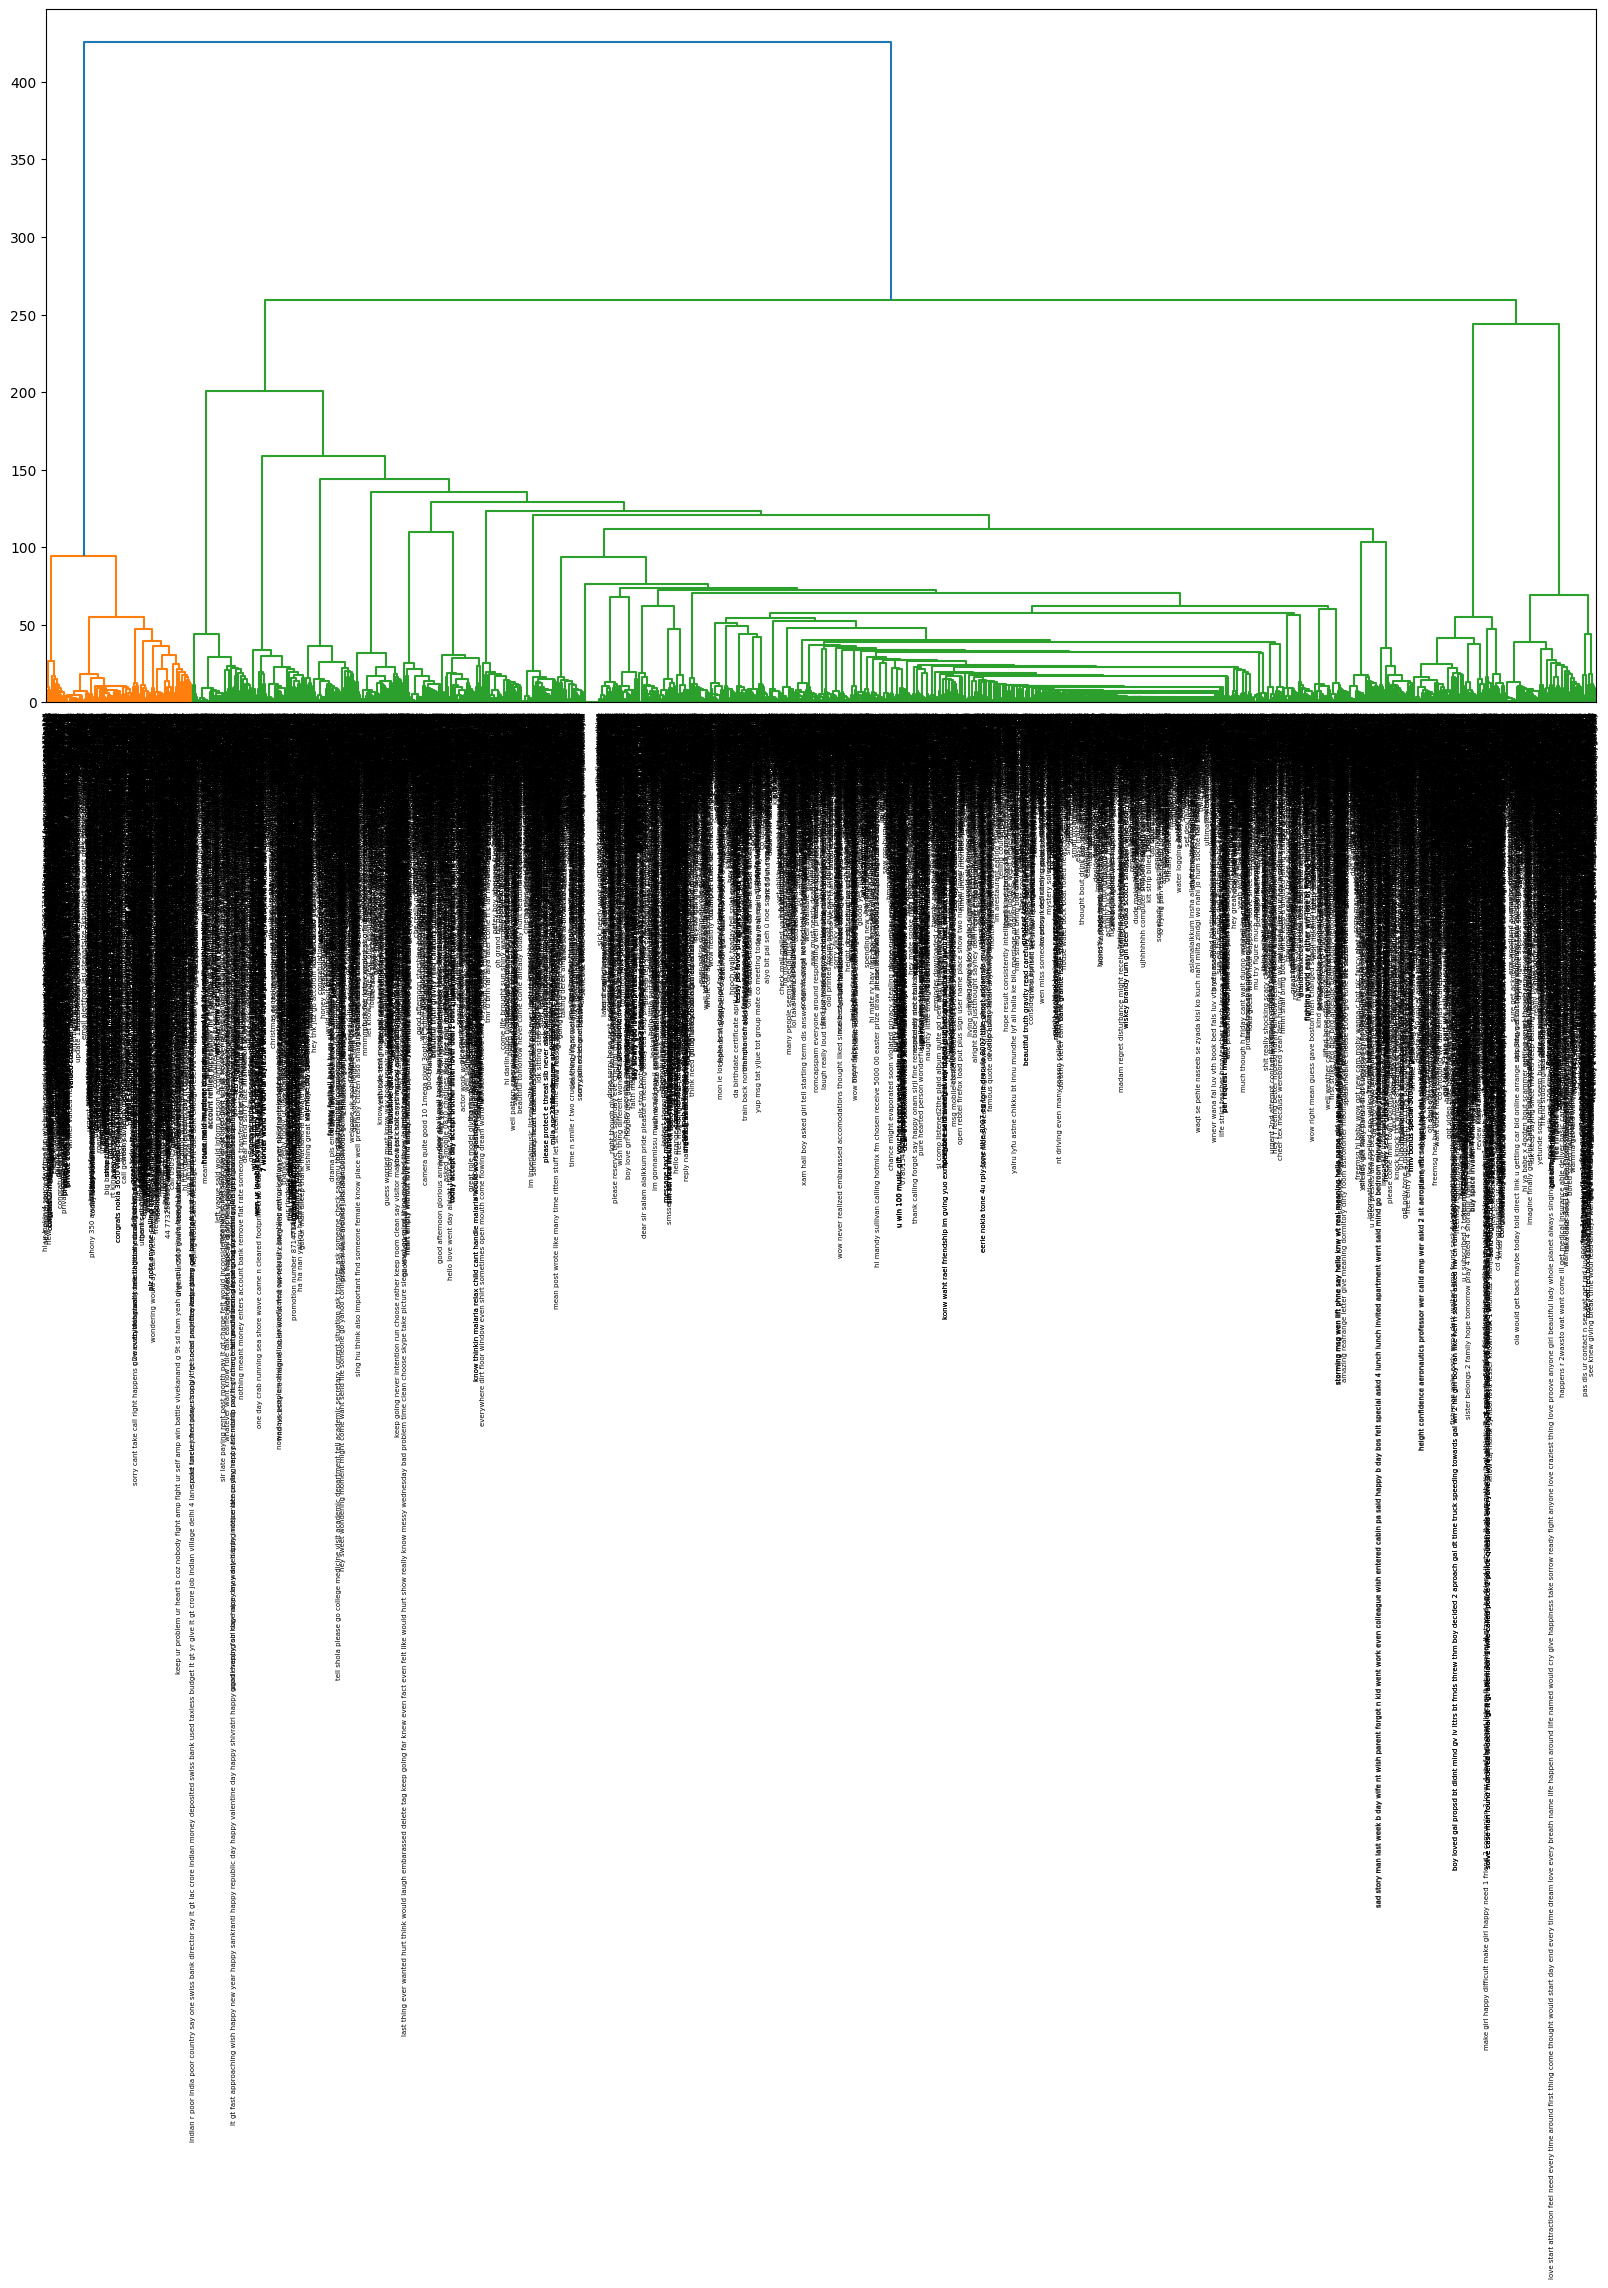

In [ ]:
# на дендрограмме чётко видим два кластера - очевидно, это и есть разделение на спам и неспам
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(cos_sim_df, method='ward')

plt.figure(figsize=(20, 9))
dendrogram = hierarchy.dendrogram(clusters,
                                  labels=list(cos_sim_df.index))

In [ ]:
df_category = data_clean[['Category']].copy()
df_category.loc[(df_category['Category'] == 'ham')] = int(0)
df_category.loc[(df_category['Category'] == 'spam')] = int(1)
df_category['Category'].astype(str).astype(int)
df_category

,Category
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
new_df = pd.concat([data_clean[['Message', 'Final']], df_category, cos_sim_df['go jurong point crazy available bugis n great world la e buffet cine got amore wat'].reset_index() ], axis=1)
new_df = new_df.rename(columns={'go jurong point crazy available bugis n great world la e buffet cine got amore wat': 'Vectors'})
new_df

,Message,Final,Category,index,Vectors
0,go until jurong point crazy available only in ...,go jurong point crazy available bugis n great ...,0,go jurong point crazy available bugis n great ...,1.000000
1,lar joking wif oni,lar joking wif oni,0,lar joking wif oni,0.000000
2,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,1,free entry 2 wkly comp win fa cup final tkts 2...,0.000000
3,u dun say so early hor c already then say,u dun say early hor c already say,0,u dun say early hor c already say,0.000000
4,nah i don t think he goes to usf he lives arou...,nah think go usf life around though,0,nah think go usf life around though,0.458615
...,...,...,...,...,...
5567,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u 750 pound prize 2 c...,1,2nd time tried 2 contact u 750 pound prize 2 c...,0.000000
5568,will ü b going to esplanade fr home,ü b going esplanade fr home,0,ü b going esplanade fr home,0.000000
5569,pity was in mood for that so any other suggest...,pity mood suggestion,0,pity mood suggestion,0.000000
5570,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...,0,guy bitching acted like interested buying some...,0.000000


In [ ]:
#  Поместим данные в переменную Х
X = cos_sim_df.copy()
X.head()

,go jurong point crazy available bugis n great world la e buffet cine got amore wat,lar joking wif oni,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18,u dun say early hor c already say,nah think go usf life around though,freemsg hey darling 3 week word back like fun still tb xxx std chgs send 1 50 rcv,even brother like speak treat like aid patent,per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune,winner valued network customer selected receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hour,mobile 11 month r entitled update latest colour mobile camera free call mobile update co free 08002986030,...,lor sony ericsson salesman ask shuhui say quite gd 2 use considering,ard 6 like dat lor,wait til least wednesday see get,huh lei,reminder o2 get 2 50 pound free call credit detail great offer pls reply 2 text valid name house postcode,2nd time tried 2 contact u 750 pound prize 2 claim easy call 087187272008 now1 10p per minute bt national rate,ü b going esplanade fr home,pity mood suggestion,guy bitching acted like interested buying something else next week gave u free,rofl true name
go jurong point crazy available bugis n great world la e buffet cine got amore wat,1.000000,0.0,0.000000,0.000000,0.458615,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.050620,0.000000,0.0,0.0,0.000000,0.0
lar joking wif oni,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18,0.000000,0.0,1.000000,0.161722,0.000000,0.001405,0.0,0.0,0.0,0.192657,...,0.520294,0.0,0.0,0.0,0.548482,0.367080,0.0,0.0,0.247064,0.0
u dun say early hor c already say,0.000000,0.0,0.161722,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.132800,0.0,0.0,0.0,0.000000,0.133829,0.0,0.0,0.202563,0.0
nah think go usf life around though,0.458615,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
data_class = new_df['Category'].copy().values.astype('int')
data_class

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
type(data_class)

numpy.ndarray

In [ ]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_class, random_state=42)

In [ ]:
# Построим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))
# Точность 94.2%. Точность достаточно хорошая.

0.9425699928212491

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ -923.9833 , -2161.0928 ,  7204.6353 , ...,  -555.45935,
        -8244.5205 ,  6022.3047 ]], dtype=float32)

In [ ]:
# визуализируем дискриминантные линии
small_train = X_train
small_test = X_test

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_small.means_

array([[0.04397082, 0.00170422, 0.03551573, ..., 0.00034949, 0.02877719,
        0.00261171],
       [0.02034376, 0.        , 0.19891017, ..., 0.        , 0.08386152,
        0.00352538]])

Text(0, 0.5, 'Инерция')

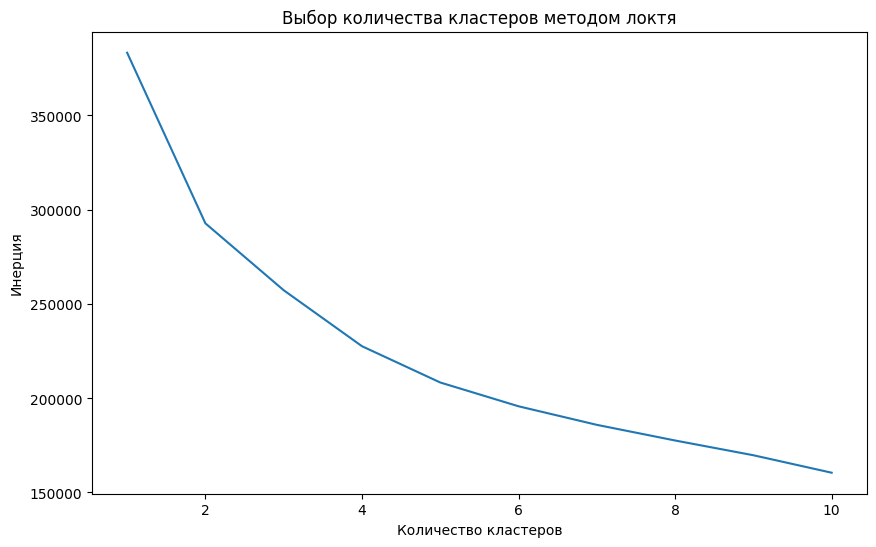

In [ ]:
# импортируем нужный класс
from sklearn.cluster import KMeans

# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

# возвращаем последовательность чисел, воспользуясь функцией range
# в данном случае числа от 1 до 10
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 25) # настроим параметры модели
   kmeans.fit(X) # обучим модель на наших данных с разным количеством кластеров
   wcss.append(kmeans.inertia_) # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список

# зададим размер графика
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')

In [ ]:
# Здесь также, как и на дендрограмме, видно два кластера с бОльшей инерцией, чем у остальных.

In [ ]:
# заново обучим модель с двумя кластерами
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

In [ ]:
# посмотрим на WCSS
kmeans.inertia_

292713.125

In [ ]:
# посмотрим на целевую переменную
print(data_class)

[0 0 1 ... 0 0 0]


In [ ]:
# посмотрим на предсказания
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# сформируем конфьюжн матрикс для понимания верных решений и ошибок первого и второго рода
from sklearn.metrics import confusion_matrix
y_true = data_class
confusion_matrix(y_true, y_pred)

array([[4630,  195],
       [ 415,  332]])

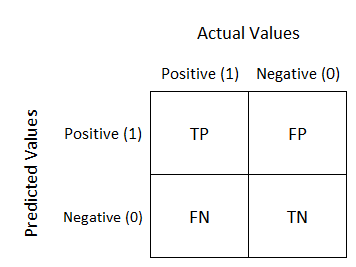

In [ ]:
# TP — истино-положительное решение:
# 4630 предсказаний было положительным (не спам), и это правда.

# TN — истино-отрицательное решение:
# 332 отрицательных значения (спам), и это правда.

# FP — ложно-положительное решение (не спам) (Ошибка первого рода):
# 195 положительных значения (не спам), и это неверно.

# FN — ложно-отрицательное решение (Ошибка второго рода):
# 415 отрицательных значения (спам), и это неверно.

In [ ]:
# создадим колонку датафрейма с предсказаниями
df = pd.DataFrame(y_pred, columns = ['Prediction'])
df

,Prediction
0,0
1,0
2,0
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [ ]:
# построим датафрейм, содержащий исходные сообщения, их начальную классификацию и предсказанную
new_df = pd.concat([data_clean[['Message']], df_category, df['Prediction']], axis=1)
new_df.head()

,Message,Category,Prediction
0,go until jurong point crazy available only in ...,0,0
1,lar joking wif oni,0,0
2,free entry in 2 a wkly comp to win fa cup fina...,1,0
3,u dun say so early hor c already then say,0,0
4,nah i don t think he goes to usf he lives arou...,0,0


In [ ]:
# Выведем сообщения, классифицированные неправильно
# df.loc[((df['col1'] == 'A') &(df['col2' ] == 'G'))]
new_df.loc[(new_df['Category'] != new_df['Prediction'])]

,Message,Category,Prediction
2,free entry in 2 a wkly comp to win fa cup fina...,1,0
5,freemsg hey there darling it s been 3 week s n...,1,0
11,six chances to win cash from 100 to 20 000 pou...,1,0
12,urgent you have won a 1 week free membership i...,1,0
15,xxxmobilemovieclub to use your credit click th...,1,0
...,...,...,...
5492,marvel mobile play the official ultimate spide...,1,0
5497,sms services for your inclusive text credits p...,1,0
5537,want explicit sex in 30 secs ring 02073162414 ...,1,0
5540,asked 3mobile if 0870 chatlines inclu in free ...,1,0


In [ ]:
# Ура! Я победила эту задачу!

In [ ]:
# Конечно, лучше было бы сравнивать сообщения не сами с собой, а с маркерми спама.
# Но, понятно, что в рамках обучения нам нужно было рассмотреть способ квадратной матрицы векторов, поэтому количество строк и столбцов должно быть одинаковым.